## GRAPHS

In [1]:
from graphviz import Digraph, Graph
import numpy as np
from collections import defaultdict, deque

In [6]:
#  directed as dictionary
graph = {'A': ['B', 'C'],
         'B': ['C', 'D'],
         'C': ['D'],
         'D': ['C'],
         'E': ['F'],
         'F': ['C']}
# as adj matrix

M = np.array([[0., 1., 1., 0., 0.,0.],
           [0., 0., 1., 1., 0.,0.],
           [0., 0., 0., 1., 0., 0.],
           [0., 0., 1., 0., 0., 0.],
           [0., 0., 0., 0., 0., 1.],
           [0., 0, 1., 0, 0, 0]])


In [7]:
M

array([[0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [8]:
DAG = Digraph()
for node in graph.keys():
    DAG.node(node)
    for next_node in graph[node]:
        DAG.edge(node,next_node)


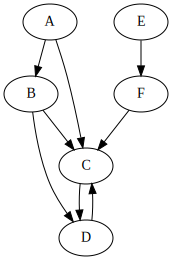

In [9]:
DAG

In [10]:
# find a path through a directed graph
def find_path(graph, start, end, path = []):
    path = path + [start]
    if start == end:
        return path
    if start not in graph:
        return None
    for node in graph[start]:
        if node not in path:
            newpath = find_path(graph, node, end, path)
            if newpath:
                return newpath
    return None


*BIG CAVEAT*

path = path + [start] creates a NEW list object

path.append(start) would have modified 'path' in the caller


In [11]:
# modification to find all paths
def find_all_paths(graph, start, end, path = []):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

fap(g,B,D,[])
path = [B]
paths = []
for node in [C, D]
   newpaths =  fap(G, C, D, [B]) <-- [[B,C,D]]
       paths = [[B,C,D]]
   newpaths = fap(G,D,D, [B])  <-- [[B,D]]
       paths = [[B,C,D], [B,D]]
   

    fap(G, C, D, [B])
    path = [B, C]
    paths = []
    for node in [D]
        newpaths = fap(G,D,D, [B C])  <---[[B,C,D]]
        paths = [[B,C,D]]
    return [[B,C,D]]

    fap(G,D,D, [B C])
    path = [B, C, D]
    return [[B, C, D]]



    fap(G,D,D,[B])
    path = [B,D]
    return [[B,D]]

In [12]:
find_path(graph, 'B', 'C')

['B', 'C']

In [13]:
find_path(graph, 'A', 'D')

['A', 'B', 'C', 'D']

In [14]:
find_all_paths(graph, 'A', 'D')

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'D']]

In [15]:
# random DAG adjacency matrix
def random_digraph(n: int, density: int):
    # n is the number of nodes
    # density is the number of edges
    Adj = np.zeros(n*n)
    Adj[:density] = 1
    np.random.shuffle(Adj)
    Adj = np.reshape(Adj, (n,n))
    return Adj

In [16]:
random_digraph(5,10)

array([[0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [17]:
# random undirected graph
def random_graph(n, density):
    Adj = random_digraph(n, density)
    Adj = np.tril(Adj) + np.tril(Adj,-1).T
    return Adj

In [18]:
random_graph(5,10)


array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [19]:
def matrix_to_dict(M) -> defaultdict(list):
    alphabet = list(map(chr, range(65, 91)))
    d = defaultdict(list)
    n = M.shape[0]
    for i in range(n):
        d[alphabet[i]] = [] # make sure even nodes without outgoing edges are included
        for j in range(n):
            if M[i][j]:
                d[alphabet[i]].append(alphabet[j])
    return d

def matrix_to_dot(M):
    # check if DAG or not
    G = Digraph()
    if np.array_equal(M, M.T):
        print("undirected")
        M = np.tril(M)
        G = Graph()
    d = matrix_to_dict(M)
    for key in d:
        G.node(key)
        for node in d[key]:
            G.edge(key,node)
    return G 

In [20]:
G = random_graph(5,10)

In [21]:
G

array([[0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1.]])

In [22]:
G.T

array([[0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1.]])

In [23]:
Adj = matrix_to_dict(G)

In [24]:
dot = matrix_to_dot(G)

undirected


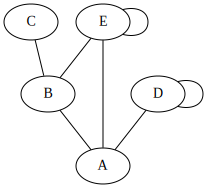

In [25]:

dot

In [22]:
class Node:
    def __init__(self, label=None, key=None, d = None, pred = None):
        self.label = label
        self.key = key
        self.d = d
        self.pred = pred

In [23]:
class Graph:
    '''
    Graph is initialized from an adjacency matrix.  
    Maintains an array of nodes Graph.V, and a dictionary
    Graph.adj that maps nodes to a list of their adjacent
    vertices. 
    Graph.dot() returns an image of the graph.
    '''
    def __init__(self, adj_matrix):
        self.adj_matrix = adj_matrix
        self.V = {}
        self.adj = matrix_to_dict(adj_matrix)
        self.adj_dict_to_nodes(self.adj)
    def __call__(self, vertex: str):
        return self.V[vertex]
    
    def adj_dict_to_nodes(self, adj_dict):
        for node in adj_dict:
            self.V[node] = Node(node)

    def dot(self):
        return matrix_to_dot(self.adj_matrix)

In [24]:
graph

{'A': ['B', 'C'],
 'B': ['C', 'D'],
 'C': ['D'],
 'D': ['C'],
 'E': ['F'],
 'F': ['C']}

In [25]:
G = Graph(M)
G('A')

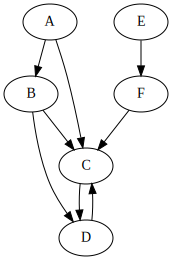

In [26]:
G.dot()

In [27]:
G.adj['A']


['B', 'C']

In [28]:
G.V['A'].label

'A'

## Breadth First Search
Discovers all nodes in graph G that are reachable from a source node s.  The graph can be directed or undirected.

Each discovered node holds distance d and precedessor p information, where d
is the shortest path distance from s to the node. 

O(V + E)


In [206]:
def BFS(G: Graph, s: str):
    for vertex in G.V:
        G(vertex).color = 'white'
        G(vertex).d = None  # distance to s
        G(vertex).p = None  # predecessor of node in graph
    G(s).color = 'gray'
    G(s).d = 0
    Q = deque()  # FIFO queue
    Q.append(s)
    while Q:
        u = Q.popleft()
        for vertex in G.adj[u]:
            if G(vertex).color == 'white':
                G(vertex).color = 'gray'
                G(vertex).d = G.V[u].d + 1
                G(vertex).p = u
                Q.append(node)
        G(u).color = 'black'
    
    

In [207]:
def BFS_print_path(G: graph, s: str, v: str):
    # prints shortest path from s to v in G
    if v == s:
        print(s)
    elif G.V[v].p == None:
        print("no path from s to v exists")
    else:
        BFS_print_path(G, s, G.V[v].p)
        print(v)

In [208]:
def BFS_tree(G: graph, s: str):
    BFS(G, s)
    tree = Digraph()
    tree.node(s)
    for node in G.V:
        if G.V[node].p is not None:
            tree.edge(G.V[node].p, node)
    return tree

In [209]:
M

array([[0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [210]:
G = Graph(M)

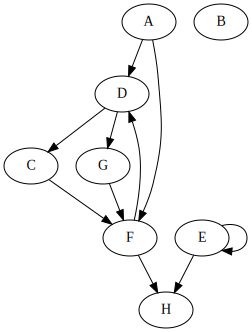

In [211]:
G.dot()

In [212]:
BFS(G, 'A')

In [213]:
BFS_print_path(G, 'A', 'D')

A
D


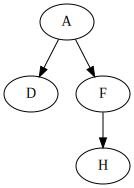

In [222]:
BFS_tree(G,'A')

In [146]:
M = random_digraph(8,10)

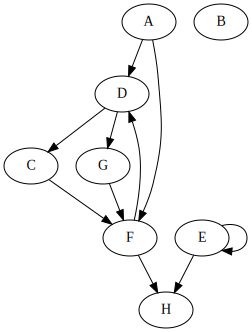

In [154]:
G1 = Graph(M)
G1.dot()

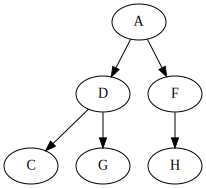

In [157]:
BFS_tree(G1, 'A')

In [155]:
G1.adj

defaultdict(list,
            {'A': ['D', 'F'],
             'B': [],
             'C': ['F'],
             'D': ['C', 'G'],
             'E': ['E', 'H'],
             'F': ['D', 'H'],
             'G': ['F'],
             'H': []})

In [153]:
M

array([[0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

## Depth First Search
Whereas BFS discovers all vertex v in graph G reachable from a source node s, DFS discovers __all__ vertices.  G can be directed or undirected.

Instead of a single tree, DFS creates a depth-first forest.

DFA records two time steps for each vertex: v.d records when the node was discvoered (and grayed) and v.f records when the search finishes examining v's adjacency list (and blackens v).

Vertex u is WHITE before time u.d, GRAY between time u.d and time u.f, and BLACK thereafter.

In [215]:
def DFS(G: Graph):
    for vertex in G.V:
        G(vertex).color = 'WHITE'
        G(vertex).p = None
    time = 0
    
    def DFS_VISIT(G: Graph, u):
        nonlocal time
        time = time + 1
        G(u).d = time
        G(u).color = 'GRAY'
        for adjacent in G.adj[u]:
            if G(adjacent).color == 'WHITE':
                G(adjacent).p = u
                DFS_VISIT(G, adjacent)
        G(u).color = 'BLACK'
        time = time + 1
        G(u).f = time
        
        
    for vertex in G.V:
        if G.V[vertex].color == 'WHITE':
            DFS_VISIT(G,vertex)

    
            

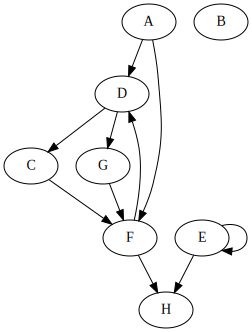

In [216]:
G1.dot()

In [217]:
DFS(G)

In [219]:
G('B').color

'BLACK'

In [220]:
def DFS_forest(G):
    DFS(G)
    forest = Digraph()
    if np.array_equal(G.adj_matrix, G.adj_matrix.T):
        forest = Graph()
    for vertex in G.V:
        forest.node( vertex, f'{vertex}: \n d: {G.V[vertex].d}, f: {G.V[vertex].f}', color='red')
        if G.V[vertex].p is not None:
            forest.edge(G.V[vertex].p, vertex)
    return forest

In [221]:
DFS_forest(G1)

TypeError: 'Graph' object is not callable

In [202]:
for vertex in G.V:
    print(vertex, G.V[vertex].color)

A BLACK
B BLACK
C BLACK
D BLACK
E BLACK
F BLACK


In [197]:
G2 = random_graph(8,12)
G2 = Graph(G2)

In [200]:
G2.adj_matrix

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])